In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from utils import Constellation, tle_from_orbital_parameters, starlink_constellation
from astropy import units as u
from lsst.sims.utils import _angularSeparation

import sqlite3
import pandas as pd


In [2]:
satellites = starlink_constellation()

In [3]:
constellation = Constellation(satellites)

In [4]:
mjd = 59853.9856438209
constellation.update_mjd(mjd)

In [5]:
mjd = 59853.9856438209+.01
constellation.check_pointing(60., 0., mjd)

0.14285714285714285

In [6]:
mjd = 59853.9856438209-.1
fields_hit = constellation.fields_hit(mjd)
fields_hit.max()

7.0

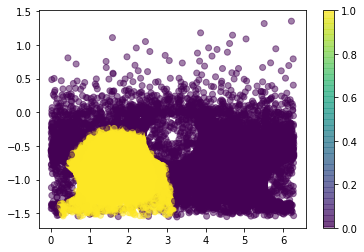

In [7]:
plt.scatter(constellation.azimuth_rad,constellation.altitudes_rad, c=constellation.eclip, alpha=.5)
plt.colorbar()

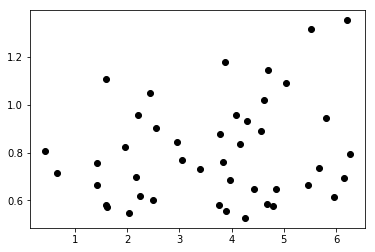

In [8]:
good = constellation.above_alt_limit
plt.plot(constellation.azimuth_rad[good],constellation.altitudes_rad[good], 'ko')

In [9]:
# Let's look at what happens in a 30s advance
constellation.update_mjd(59853.9856438209)
dt = 5./3600./24.
good = constellation.above_alt_limit.copy()
az1 = constellation.azimuth_rad[good] +0
alt1 = constellation.altitudes_rad[good] + 0


constellation.update_mjd(59853.9856438209 + dt)

az2 = constellation.azimuth_rad[good] +0
alt2 = constellation.altitudes_rad[good] + 0



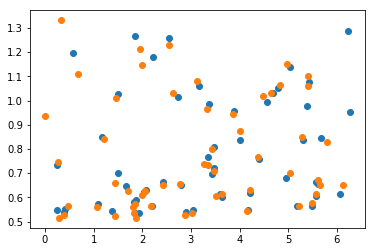

In [10]:
plt.plot(az1, alt1, 'o')
plt.plot(az2, alt2, 'o')

In [11]:
dist =  _angularSeparation(az1, alt1, az2, alt2)

In [12]:
np.degrees(dist)

array([ 3.10563489,  3.44255484,  2.02867762,  2.33330251,  3.20712832,
        2.244282  ,  0.85236313,  1.52598507,  1.47858778,  0.82436445,
        1.17554376,  1.14853601,  1.27557369,  1.32731896,  0.84517267,
        0.78701428,  1.49203528,  1.64313515,  0.89366325,  1.20126942,
        1.4029921 ,  0.93922727,  1.11373836,  0.9130131 ,  1.55641161,
        1.38614424,  0.76164165,  0.96832239,  1.63130918,  1.39218313,
        0.75917208,  0.85837954,  1.17608565,  1.40550964,  1.28668924,
        0.95993251,  0.9477297 ,  0.91232486,  0.93397086,  3.91351666,
        3.92887458,  4.13966073,  3.69265498,  3.42724428,  2.44395983,
        3.05107974,  2.98639879,  3.25100479,  3.01223739,  4.74000837,
        5.7702811 ,  4.78947706,  3.0149851 ,  3.75113687,  5.48875132,
        6.16668999])

In [13]:
# OK, so some of these things are moving 30 degrees on sky in 30 seconds. So we literally have to do 1-2s timesteps to get them.


In [ ]:
conn = sqlite3.connect('baseline_v1.3_10yrs.db')
df = pd.read_sql('select altitude,azimuth,observationstartmjd from summaryallprops where night=150;', conn)
conn.close()

# let's see if we can just advance the epoch
constellation.advance_epoch(advance=100)

In [ ]:
# %%time
in_fovs = []
for val in df.values:
    in_fovs.append(constellation.check_pointing(val[0], val[1], val[2]))

In [ ]:
# ok, so 12 hours to do this on a full year. 

In [ ]:
plt.plot(df['observationStartMJD'], in_fovs, 'o-')

In [ ]:
np.where(np.array(in_fovs) > 0)[0].size/np.size(in_fovs)